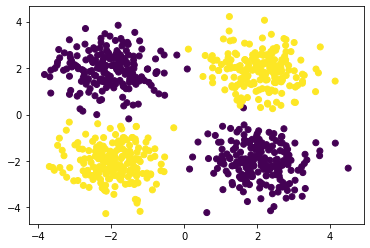

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
std = [[0.5, 0], [0, 0.5]]
X1 = np.vstack((
    np.random.multivariate_normal([2, -2], std, size=200),
    np.random.multivariate_normal([-2, 2], std, size=200)
))
y1 = np.zeros(X1.http://localhost:8888/notebooks/Homework6.ipynb#shape[0])

X2 = np.vstack((
    np.random.multivariate_normal([2, 2], std, size=200),
    np.random.multivariate_normal([-2, -2], std, size=200)
))
y2 = np.ones(X2.shape[0])

X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
svc_classifier = SVC(kernel='rbf', gamma='auto')
svc_classifier.fit(X_train, y_train)
result = svc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, result)
print(accuracy)


1.0


In [58]:
kernel=["linear","rbf","poly","sigmoid"]
for i in kernel:
    model=SVC(kernel=i,C=1.0, gamma='auto')
    model.fit(X_train,y_train)
    print("For kernel:",i)
    print("Accuracy score is:",model.score(X_test,y_test))

For kernel: linear
Accuracy score is: 0.6875
For kernel: rbf
Accuracy score is: 1.0
For kernel: poly
Accuracy score is: 0.58125
For kernel: sigmoid
Accuracy score is: 0.5125


In [59]:
model=SVC(gamma='auto')
model.fit(X_train,y_train)
print("Accuracy of test data",model.score(X_test,y_test))
print("Accuracy of train data",model.score(X_train,y_train))

Accuracy of test data 1.0
Accuracy of train data 0.996875


In [60]:
from sklearn.model_selection import GridSearchCV
grid_parameters={"C":[0.1,1,100],"kernel":["rbf","poly","sigmoid","linear"],"degree":[1,2,3]}
grid=GridSearchCV(SVC(gamma="auto"),grid_parameters, cv=3, refit = True, verbose = 3,n_jobs=None,iid=True)
# fitting the model for grid search 
grid.fit(X_train,y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, degree=1, kernel=rbf .....................................
[CV] ......... C=0.1, degree=1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=1, kernel=rbf .....................................
[CV] ......... C=0.1, degree=1, kernel=rbf, score=0.991, total=   0.0s
[CV] C=0.1, degree=1, kernel=rbf .....................................
[CV] ......... C=0.1, degree=1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV] ........ C=0.1, degree=1, kernel=poly, score=0.435, total=   0.0s
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV] ........ C=0.1, degree=1, kernel=poly, score=0.687, total=   0.0s
[CV] C=0.1, degree=1, kernel=poly ....................................
[CV] ........ C=0.1, degree=1, kernel=poly, score=0.689, total=   0.0s
[CV] C=0.1, degree=1, kernel=sigmoid .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, degree=3, kernel=sigmoid, score=0.519, total=   0.0s
[CV] C=0.1, degree=3, kernel=sigmoid .................................
[CV] ..... C=0.1, degree=3, kernel=sigmoid, score=0.472, total=   0.0s
[CV] C=0.1, degree=3, kernel=sigmoid .................................
[CV] ..... C=0.1, degree=3, kernel=sigmoid, score=0.486, total=   0.0s
[CV] C=0.1, degree=3, kernel=linear ..................................
[CV] ...... C=0.1, degree=3, kernel=linear, score=0.435, total=   0.0s
[CV] C=0.1, degree=3, kernel=linear ..................................
[CV] ...... C=0.1, degree=3, kernel=linear, score=0.706, total=   0.0s
[CV] C=0.1, degree=3, kernel=linear ..................................
[CV] ...... C=0.1, degree=3, kernel=linear, score=0.689, total=   0.0s
[CV] C=1, degree=1, kernel=rbf .......................................
[CV] ........... C=1, degree=1, kernel=rbf, score=0.995, total=   0.0s
[CV] C=1, degree=1, kernel=rbf .......................................
[CV] .

[CV] ...... C=100, degree=2, kernel=linear, score=0.435, total=   0.2s
[CV] C=100, degree=2, kernel=linear ..................................
[CV] ...... C=100, degree=2, kernel=linear, score=0.706, total=   0.2s
[CV] C=100, degree=2, kernel=linear ..................................
[CV] ...... C=100, degree=2, kernel=linear, score=0.684, total=   0.2s
[CV] C=100, degree=3, kernel=rbf .....................................
[CV] ......... C=100, degree=3, kernel=rbf, score=0.991, total=   0.0s
[CV] C=100, degree=3, kernel=rbf .....................................
[CV] ......... C=100, degree=3, kernel=rbf, score=0.991, total=   0.0s
[CV] C=100, degree=3, kernel=rbf .....................................
[CV] ......... C=100, degree=3, kernel=rbf, score=0.995, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.542, total=   5.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   15.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=True, n_jobs=None,
             param_grid={'C': [0.1, 1, 100], 'degree': [1, 2, 3],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [61]:
# print best parameter after tuning  
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.1, 'degree': 1, 'kernel': 'rbf'}
1.0


In [62]:
print(grid.best_estimator_)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
